In [49]:
#Global Yotube Statistics
##Importing libraries and functions: First we need to import all the funcionts and libraries that we are going to use

from pandas.io.parsers.readers import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#We are going to import the dataset
data_base = pd.read_csv("/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv", encoding="latin-1")

In [51]:
print(data_base.head(5))# we are going to see the 15 rows of the dataset

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [52]:
data_base.info() #lets see the information that we have of this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [53]:
#Now we need to check the summarie of the data
print(data_base.describe(include = "all"))

             rank  Youtuber   subscribers   video views       category  \
count   995.00000       995  9.950000e+02  9.950000e+02            949   
unique        NaN       995           NaN           NaN             18   
top           NaN  T-Series           NaN           NaN  Entertainment   
freq          NaN         1           NaN           NaN            241   
mean    498.00000       NaN  2.298241e+07  1.103954e+10            NaN   
std     287.37606       NaN  1.752611e+07  1.411084e+10            NaN   
min       1.00000       NaN  1.230000e+07  0.000000e+00            NaN   
25%     249.50000       NaN  1.450000e+07  4.288145e+09            NaN   
50%     498.00000       NaN  1.770000e+07  7.760820e+09            NaN   
75%     746.50000       NaN  2.460000e+07  1.355470e+10            NaN   
max     995.00000       NaN  2.450000e+08  2.280000e+11            NaN   

          Title        uploads        Country Abbreviation   channel_type  \
count       995     995.000000    

#With this information we have identify that we have 995 youtubers from 49 different countries and all the channels are splited in 18 different categories.

In [54]:
#Now lets check if we have any missing value
data_base.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

#we can see that we have a lot of missing value but this time we are not focus on this because we are going to make only a EDA

In [55]:
data_base.groupby("Youtuber")["subscribers"].sum()

Youtuber
#Refugio Mental                              14100000
#Refï¿½ï¿½ï¿½ï¿½                             12700000
123 GO! Spanish                              13800000
1MILLION Dance Studio                        26100000
1theK (ï¿½ï¿½ï¿½ï¿½ï                         24500000
                                               ...   
ýýýýýýýýýýýýýýýý - Al-Remas                  17400000
ýýýýýýýýýýýýýýýýýý                           13300000
ýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýý    14100000
ýýýýýýýýýýýýýýýýýýýýý                        14400000
ýýýýýýýýýýýýýýýýýýýýýý                       18800000
Name: subscribers, Length: 995, dtype: int64

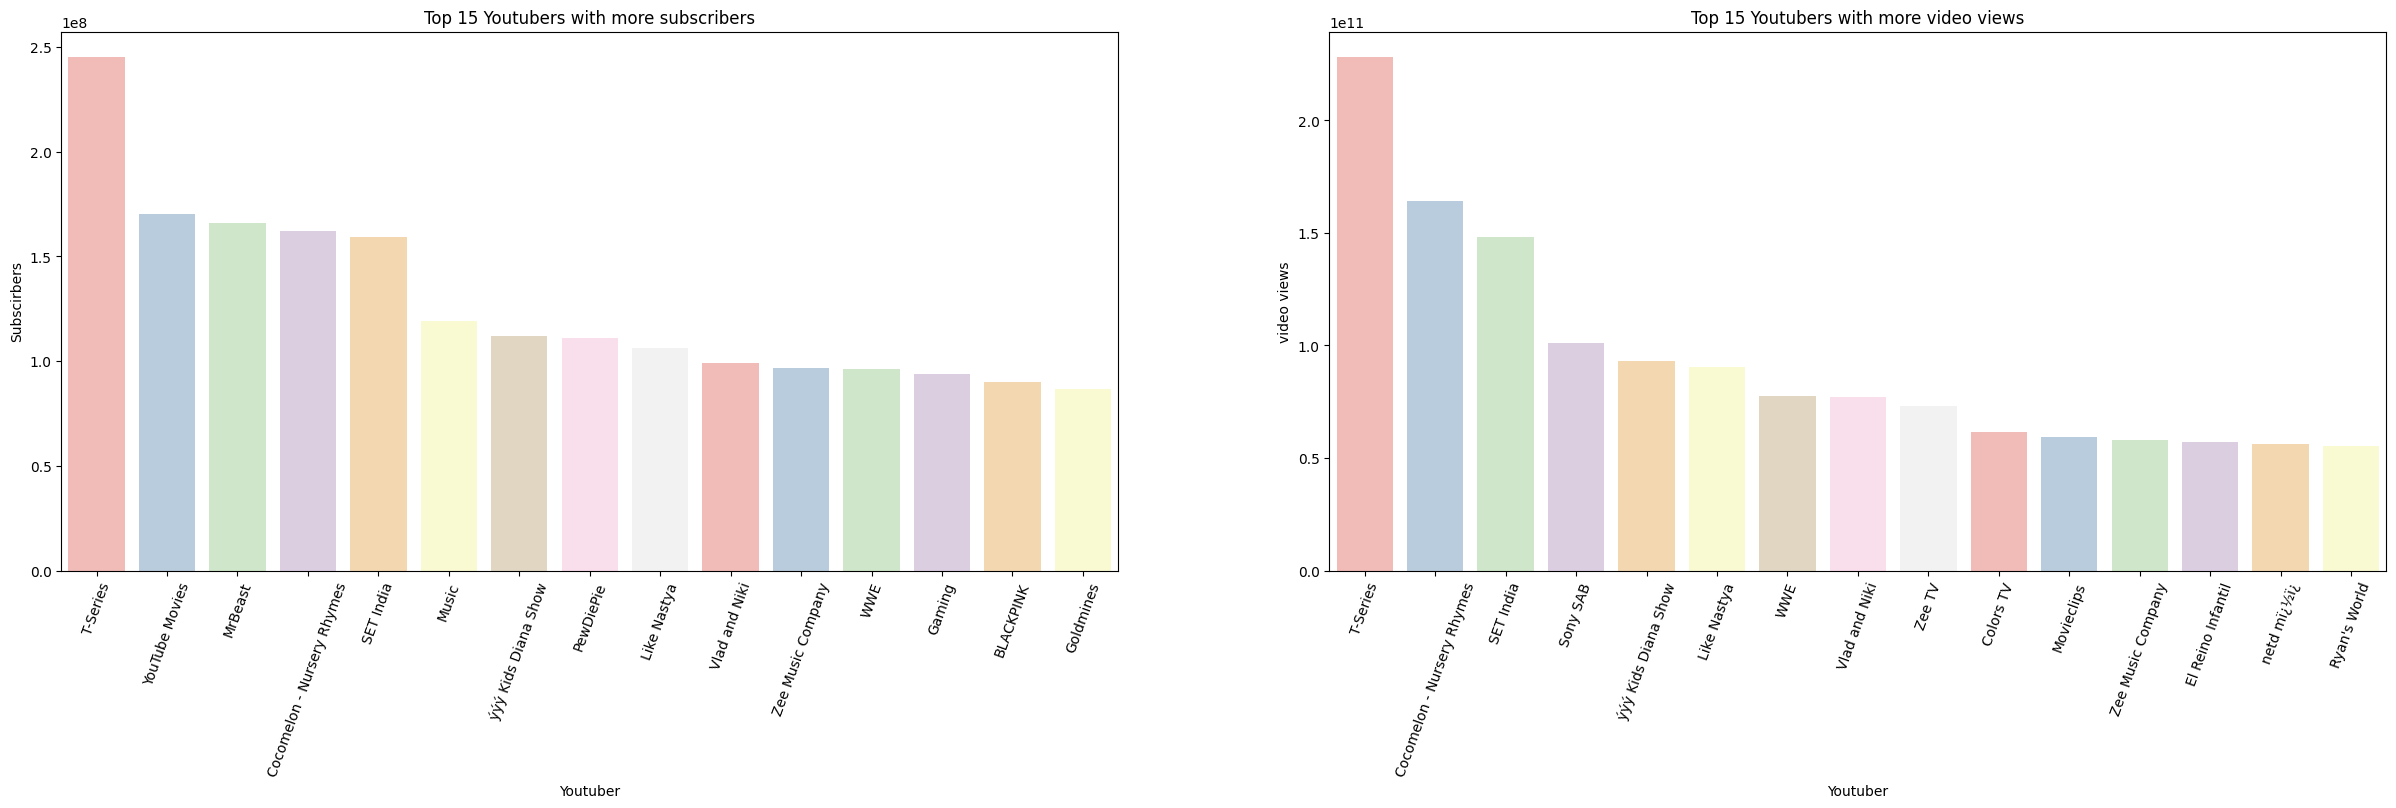

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(30,7))
new_palette = sns.color_palette("Pastel1")
sns.barplot(data=data_base,x="Youtuber", y="subscribers", order=data_base.sort_values('subscribers',ascending=False).Youtuber.iloc[:15], ax=ax1, palette=new_palette)
ax1.set(xlabel="Youtuber", ylabel="Subscirbers",title= "Top 15 Youtubers with more subscribers")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)

sns.barplot(data=data_base, x="Youtuber", y="video views", order=data_base.sort_values('video views',ascending=False).Youtuber.iloc[:15], ax=ax2, palette=new_palette)
ax2.set(xlabel="Youtuber", ylabel="video views",title= "Top 15 Youtubers with more video views")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
plt.show()

With this two charts we can not assume that the quantity of subscribers will give more views so what will be the the features that have a bigger corr with the views?

In [57]:
#Here we are going to create a new column that will named "Actived years"
data_base["Actived Years"] = 2023 - data_base["created_year"]

In [58]:
print(data_base.head(5))
print(data_base["created_year"].info())
print(data_base.isnull().sum())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  created_year  created_month  created_date  \
0           IN          Music  ...        2006.0            Mar        

In [59]:
#Now let's check the correlation between the features to determinate what is the one who has a bigger cor with the video_views
db_corr = data_base[['video views', 'subscribers', 'uploads','lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'Actived Years']]
corr = db_corr.corr()
corr.style.background_gradient()

,video views,subscribers,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,Actived Years
video views,1.000000,0.750958,0.165928,0.552096,0.551455,0.552776,0.552091,0.127068
subscribers,0.750958,1.000000,0.077136,0.388941,0.388579,0.389072,0.388935,0.141827
uploads,0.165928,0.077136,1.000000,0.166922,0.167283,0.167745,0.166904,0.154904
lowest_monthly_earnings,0.552096,0.388941,0.166922,1.000000,0.999955,0.999942,0.999998,-0.072316
highest_monthly_earnings,0.551455,0.388579,0.167283,0.999955,1.000000,0.999884,0.999953,-0.072289
lowest_yearly_earnings,0.552776,0.389072,0.167745,0.999942,0.999884,1.000000,0.999941,-0.071911
highest_yearly_earnings,0.552091,0.388935,0.166904,0.999998,0.999953,0.999941,1.000000,-0.072263
Actived Years,0.127068,0.141827,0.154904,-0.072316,-0.072289,-0.071911,-0.072263,1.000000


We can see that subscribers is the one who have more correlation but as we see in the first charts we can not assume that is the only feature that affects the video views

In [60]:
data_base.groupby("category")["category"].count()

category
Autos & Vehicles           2
Comedy                    69
Education                 45
Entertainment            241
Film & Animation          46
Gaming                    94
Howto & Style             40
Movies                     2
Music                    202
News & Politics           26
Nonprofits & Activism      2
People & Blogs           132
Pets & Animals             4
Science & Technology      17
Shows                     13
Sports                    11
Trailers                   2
Travel & Events            1
Name: category, dtype: int64

In [61]:
data_base.groupby("category")["subscribers"].sum()

category
Autos & Vehicles           35700000
Comedy                   1388500000
Education                1194400000
Entertainment            5158200000
Film & Animation         1314900000
Gaming                   1960100000
Howto & Style             775600000
Movies                     51300000
Music                    5195000000
News & Politics           536400000
Nonprofits & Activism      55500000
People & Blogs           2779400000
Pets & Animals             72400000
Science & Technology      316500000
Shows                     541000000
Sports                    298200000
Trailers                   78000000
Travel & Events            12500000
Name: subscribers, dtype: int64

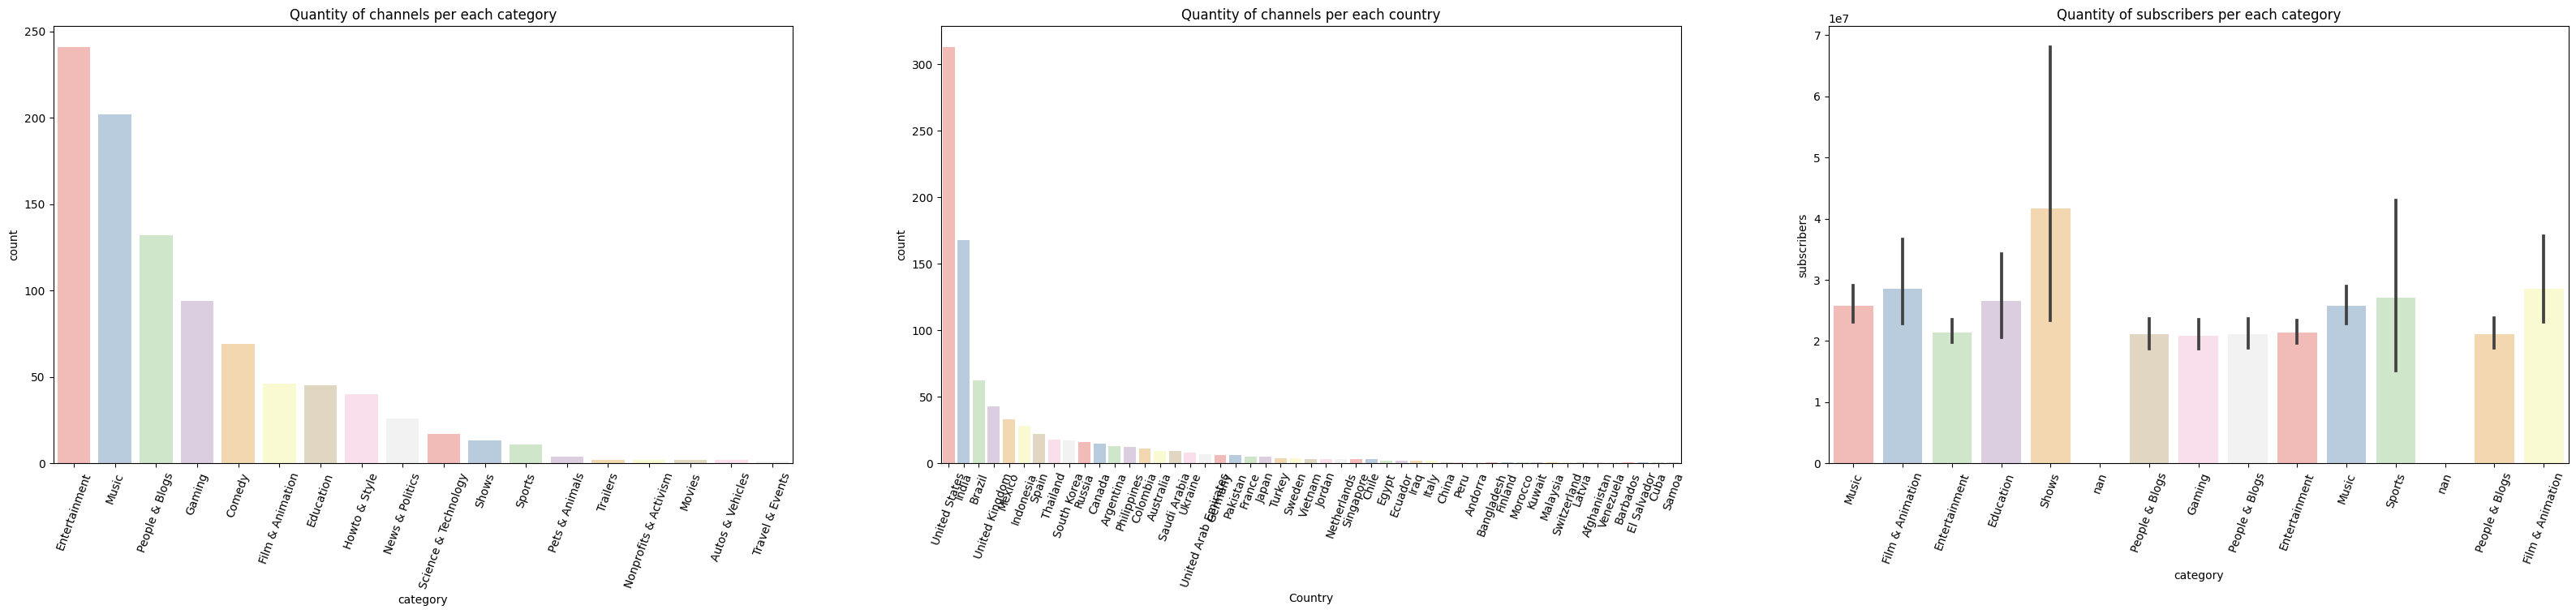

In [62]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(40,7), sharey=False)
sns.countplot(x='category',data=data_base,order=data_base['category'].value_counts(ascending=False).index,palette='Pastel1',ax=ax[0])
sns.countplot(x='Country',data=data_base,order=data_base['Country'].value_counts(ascending=False).index,palette='Pastel1',ax=ax[1])
sns.barplot(data=data_base,x="category", y="subscribers", order=data_base.sort_values('subscribers',ascending=False).category.iloc[:15], ax=ax[2], palette='Pastel1')
ax[0].set_xticklabels(list(data_base['category'].value_counts(ascending=False).index),rotation=70)
ax[1].set_xticklabels(list(data_base['Country'].value_counts(ascending=False).index),rotation=70)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=70)
ax[0].set_title('Quantity of channels per each category')
ax[1].set_title('Quantity of channels per each country')
ax[2].set_title('Quantity of subscribers per each category')
plt.show()

We can determinate the next points with these charts:  
* The entretainment category is the more commun in our data base with almost 250 channels
* The entretainment is the one with more subscribes (we need to make a replacement in the category column to have only one Entrataiment name)
* The Music category is the second category with more channels
* The Music category has the second place with more subscribes (we need to make a replacement in the category column to have only one Music name)
* US is the country with more youtube channels in the world

In [63]:
data_base.groupby("created_year")["video views"].sum()

created_year
1970.0    3.010785e+09
2005.0    3.622319e+11
2006.0    1.552260e+12
2007.0    7.179436e+11
2008.0    6.280466e+11
2009.0    6.371373e+11
2010.0    4.610661e+11
2011.0    8.512499e+11
2012.0    7.282958e+11
2013.0    6.855483e+11
2014.0    9.716846e+11
2015.0    6.739097e+11
2016.0    7.697230e+11
2017.0    4.133130e+11
2018.0    5.516746e+11
2019.0    2.874318e+11
2020.0    3.773923e+11
2021.0    2.551195e+11
2022.0    2.110010e+10
Name: video views, dtype: float64

In [64]:
data_base.groupby("created_year")["created_year"].count()

created_year
1970.0     1
2005.0    24
2006.0    91
2007.0    49
2008.0    46
2009.0    52
2010.0    48
2011.0    82
2012.0    68
2013.0    76
2014.0    98
2015.0    73
2016.0    77
2017.0    68
2018.0    46
2019.0    33
2020.0    30
2021.0    23
2022.0     5
Name: created_year, dtype: int64

In [65]:
filter2 = data_base["created_year"] > 1970

In [66]:
data_base2 = data_base[filter2]

In [67]:
print(data_base2.head(5))

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  created_year  created_month  created_date  \
0           IN          Music  ...        2006.0            Mar        

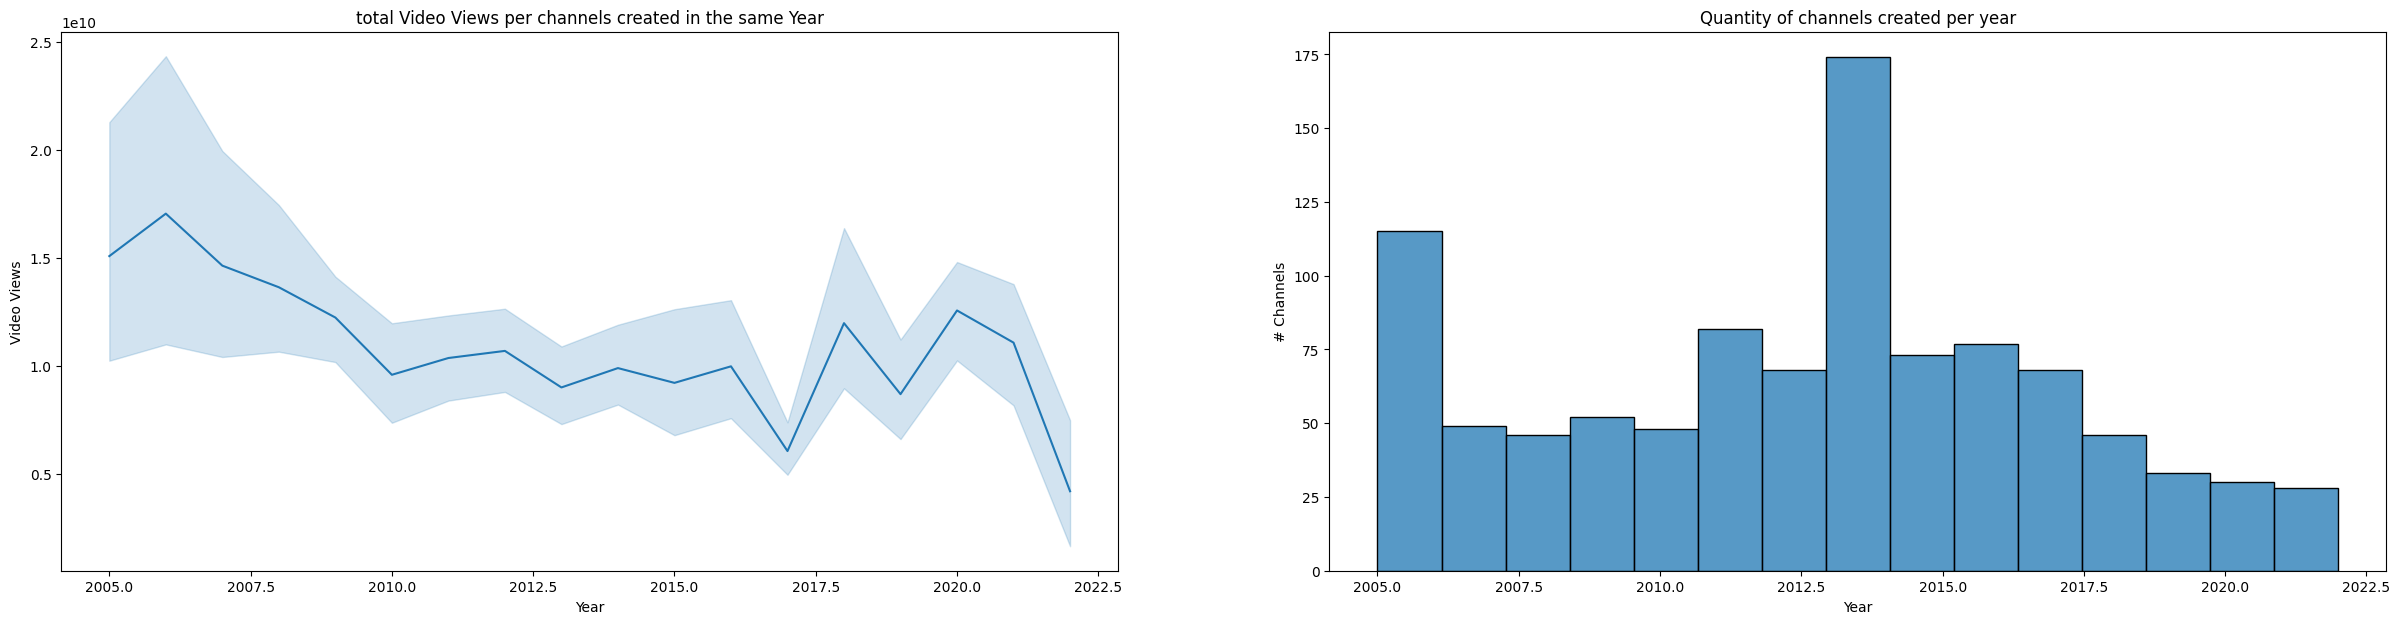

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(30,7))
sns.lineplot(data=data_base2, x="created_year", y="video views", ax=ax1)
sns.histplot(data_base2["created_year"], ax=ax2, bins=15)
ax1.set(xlabel="Year", ylabel="Video Views",title= "total Video Views per channels created in the same Year")
ax2.set(xlabel="Year", ylabel="# Channels",title= "Quantity of channels created per year")
plt.show()

With the chart we have created we can determinate the next points:
* The channels that were created bewteen 2055 and 2007 are the ones who has more video views.
* Between 2012 and 2015 was the time where more channels were created